# Binary Image Classification - MNIST

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 example

**Source :** http://yann.lecun.com/exdb/mnist/ 

### Image Classification - Training Pipeline


---

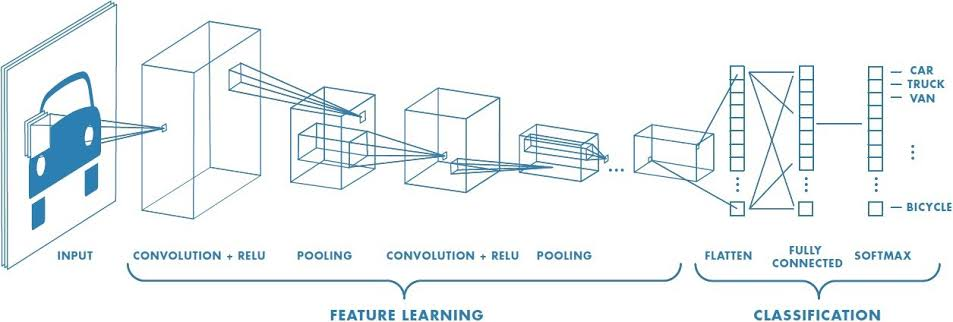


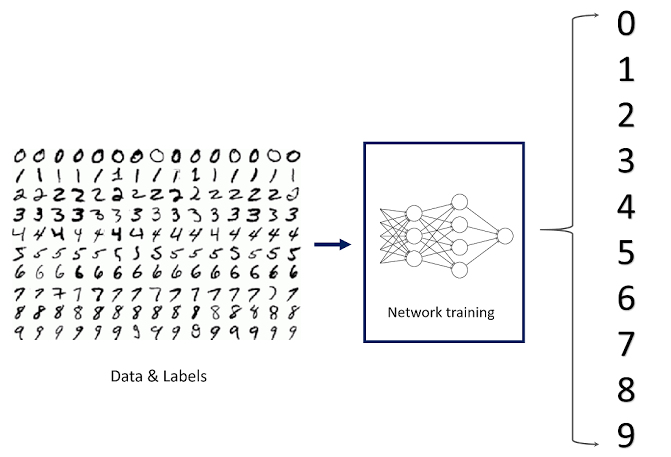

### Train - Validation - Test Sets

---

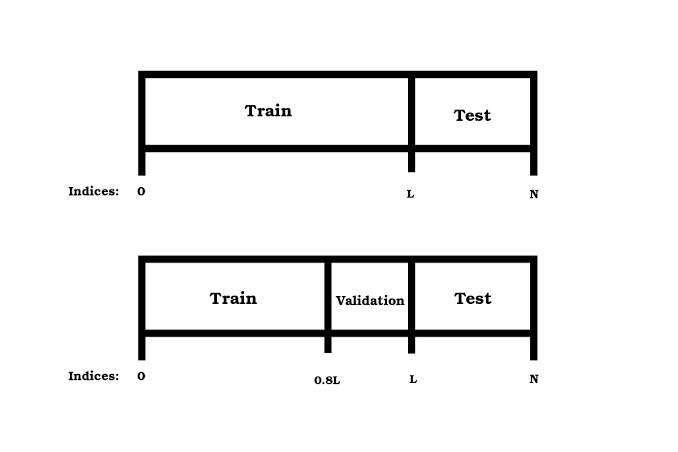

### Imports

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

## Prepare dataset

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# train set - images
x_train.shape

(60000, 28, 28)

In [ ]:
#validation ve train set belirleme
x_valid = x_train[48000:]
y_valid = y_train[48000:]

x_train = x_train[:48000]
y_train = y_train[:48000]

In [ ]:
x_train.shape

(48000, 28, 28)

In [ ]:
x_valid.shape

(12000, 28, 28)

In [ ]:
y_valid.shape

(12000,)

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (48000, 28, 28)
48000 train samples
12000 validation samples
10000 test samples


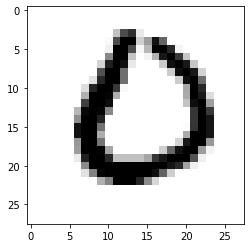

0


In [ ]:
# sample training data
index = 2500
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print(y_train[index])

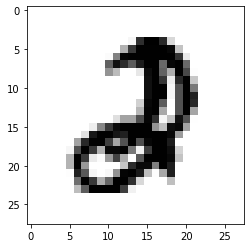

2


In [ ]:
# sample test data
index = 1395
plt.imshow(x_test[index], cmap=plt.cm.binary)
plt.show()
print(y_test[index])

**Reshape input_data - 4d**

RGB: [28, 28, 3]

Grayscale: [28, 28]

Batch: [x, 28, 28, 1]

In [ ]:
x_train.shape

(48000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train.shape

(48000, 28, 28, 1)

**use float32 instead of uint8**

In [ ]:
# before
print(x_train.dtype)

uint8


In [ ]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# after
print(x_train.dtype)

float32


**Normalize pixel values**

In [ ]:
x_train[0]

In [ ]:
#normalize pixel values (0-255) -> (0-1)
x_train /= 255
x_valid /= 255
x_test /= 255

In [ ]:
x_train[0]

**Label transformation**

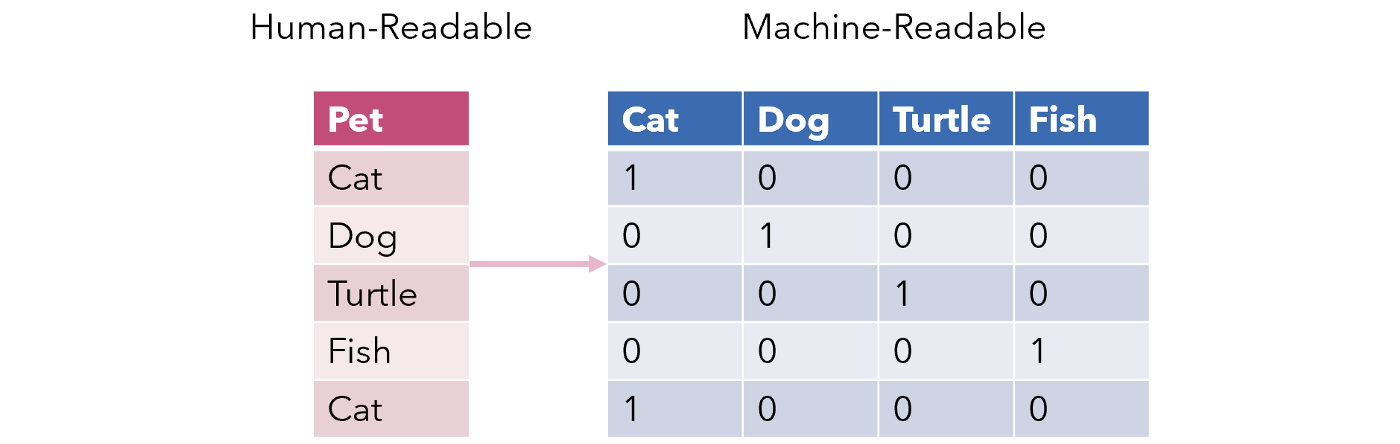




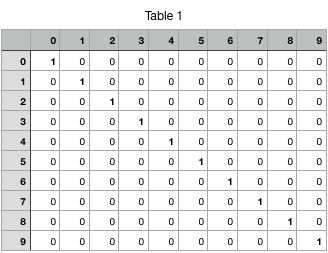


0 = [1 0 0 0 0 0 0 0 0 0]

2 = [0 0 1 0 0 0 0 0 0 0]

In [ ]:
y_train[0]

5

In [ ]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Prepare model

In [ ]:
first_model = Sequential()
first_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))

first_model.add(Flatten())
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [ ]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

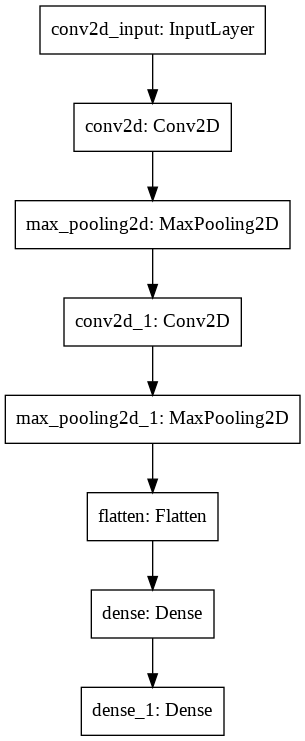

In [ ]:
from keras.utils import plot_model
plot_model(first_model)

In [ ]:
# compile model
first_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

## Training

In [ ]:
history = first_model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_valid, y_valid))

Epoch 1/3
375/375 [==============================] - 36s 93ms/step - loss: 0.7157 - accuracy: 0.7685 - val_loss: 0.0929 - val_accuracy: 0.9735
Epoch 2/3
375/375 [==============================] - 35s 92ms/step - loss: 0.0831 - accuracy: 0.9742 - val_loss: 0.0662 - val_accuracy: 0.9804
Epoch 3/3
375/375 [==============================] - 34s 91ms/step - loss: 0.0589 - accuracy: 0.9822 - val_loss: 0.0631 - val_accuracy: 0.9830


## Evaluate Model

In [ ]:
score = first_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0562 - accuracy: 0.9807
Test loss: 0.05618565157055855
Test accuracy: 0.9807000160217285


## Save model & weights to disk

In [ ]:
first_model.save('my_first_mnist_model.h5')

## (Optional) Test model with single image

In [ ]:
#download images
!wget -O test_digit_7.png https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image.png
!wget -O test_digit_0.png https://i.stack.imgur.com/FK0FB.png

--2020-12-26 11:20:06--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image.png
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.228
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61602 (60K) [image/png]
Saving to: ‘test_digit_7.png’

test_digit_7.png    100%[===================>]  60.16K  --.-KB/s    in 0.01s   

2020-12-26 11:20:06 (4.63 MB/s) - ‘test_digit_7.png’ saved [61602/61602]

--2020-12-26 11:20:06--  https://i.stack.imgur.com/FK0FB.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.30.34, 104.16.25.34, 104.16.1.35, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.30.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4934 (4.8K) [image/p

In [ ]:
plt.imshow(plt.imread("test_digit_7.png"), cmap=plt.cm.binary)
plt.show()

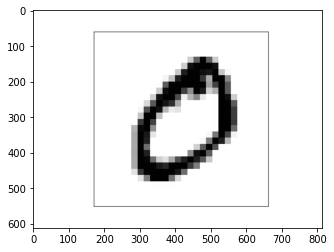

In [ ]:
plt.imshow(plt.imread("test_digit_0.png"), cmap=plt.cm.binary)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
# load model from file
first_model = load_model('my_first_mnist_model.h5')

In [ ]:
print(first_model.outputs)

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]


In [ ]:
# load image from file
image = load_img("test_digit_7.png", target_size=(28, 28), color_mode="grayscale")
image = img_to_array(image) / 255 # 0-255 -> 0-1
image = np.expand_dims(image, axis=0)
print('shape:', image.shape)

shape: (1, 28, 28, 1)


In [ ]:
preds = first_model.predict(image)

In [ ]:
preds

array([[1.4721061e-09, 1.2446759e-07, 7.3455033e-07, 1.8836894e-05,
        6.3849117e-12, 8.3335845e-11, 4.6586818e-13, 9.9997985e-01,
        1.4240084e-09, 5.1947029e-07]], dtype=float32)

In [ ]:
preds.argmax()

7

## (Optional) Model Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


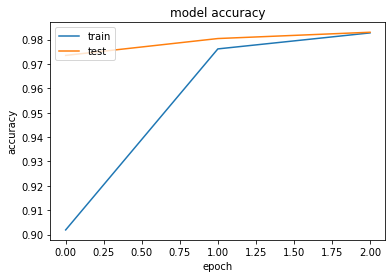

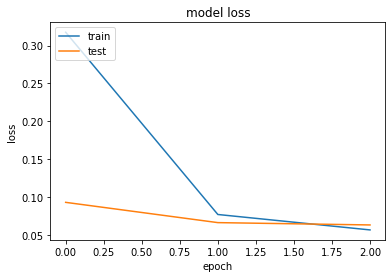

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Bonus : https://scs.ryerson.ca/~aharley/vis/conv/

## TODO
Task 1. Add 1 more convolution layer and re-train the model